## Análise exploratória das "Ocorrências Aeronáuticas na Aviação Civil Brasileira"

Marina Cavalcante

O intuito do presente código a consiste na
exploração da base dados "Ocorrências Aeronáuticas na Aviação Civil
Brasileira" dos dados abertos do governo
(https://drive.google.com/drive/folders/1C4qmp8ZfMhSBCpZZrVIPIvCVBl_N
pc_I?usp=sharing)


1. Carregar os dados

1.1 Carregar dados da Aeronave

Essa tabela traz informações sobre as aeronaves envolvidas nas ocorrências

In [1]:
# Import pandas package
import pandas as pd
# Import Drive 
from google.colab import drive

In [2]:
#Permition to access to my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Tratamento para valores faltantes identificados
missing_values = ['***','****','*****','####','###!','000']

In [4]:
aero = pd.read_csv('/content/drive/My Drive/aeronave.csv',  na_values=missing_values)

In [5]:
# Show Aeronave information
print(aero)

      codigo_aeronave  codigo_ocorrencia matricula  codigo_operador  \
0                   4              45602     PPGXE              241   
1                  40              53551     PPGSZ              160   
2                 118              43721     PTCMT             1232   
3                 130              35556     PTEQI             3992   
4                 191              32579     PPVMM             4365   
...               ...                ...       ...              ...   
2038            36454              53473    PUXXX4             3992   
2039            36455              53556    PUXXX5             3992   
2040            38934              60649     ZPBIL             3992   
2041            38941              60879     ZPTVU             3992   
2042            39147              28437     DGOMM             3992   

     equipamento                   fabricante        modelo tipo_motor  \
0          AVIÃO  NEIVA INDUSTRIA AERONAUTICA          56-C     PISTÃO   

1.2 Carregar dados de ocorrência

Essa tabela traz informações sobre as ocorrências publicadas de 2006 a 2016

In [6]:
ocorrencia = pd.read_csv('/content/drive/My Drive/ocorrencia.csv', na_values=missing_values)

In [7]:
# Show Ocorrencia information
print(ocorrencia)

      codigo_ocorrencia    classificacao  \
0                 47965         ACIDENTE   
1                 50313  INCIDENTE GRAVE   
2                 34078         ACIDENTE   
3                 44988         ACIDENTE   
4                 38855         ACIDENTE   
...                 ...              ...   
2022              36116  INCIDENTE GRAVE   
2023              33715  INCIDENTE GRAVE   
2024              25839         ACIDENTE   
2025              49474         ACIDENTE   
2026              53403         ACIDENTE   

                                           tipo            localidade   uf  \
0                         FALHA DO MOTOR EM VOO             ARIQUEMES   RO   
1                                POUSO SEM TREM                CACOAL   RO   
2                     PERDA DE CONTROLE NO SOLO            CEREJEIRAS   RO   
3                                   POUSO LONGO               AMAJARI   RR   
4                      PERDA DE CONTROLE EM VOO                ACEGUÁ   RS   
...

### 2. Processamento e tratamento dos dados

2.1 Importando bibliotecas

In [8]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

2.2 Tratando o dataset aeronave

O primeiro passo consiste em mapear as informações básicas da base para entender as informações, quantidade de valores não nulos e tipo de cada coluna

In [9]:
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   codigo_aeronave         2043 non-null   int64  
 1   codigo_ocorrencia       2043 non-null   int64  
 2   matricula               2043 non-null   object 
 3   codigo_operador         2043 non-null   int64  
 4   equipamento             2038 non-null   object 
 5   fabricante              1933 non-null   object 
 6   modelo                  2028 non-null   object 
 7   tipo_motor              2015 non-null   object 
 8   quantidade_motores      2003 non-null   float64
 9   peso_maximo_decolagem   2014 non-null   float64
 10  quantidade_assentos     1942 non-null   float64
 11  ano_fabricacao          1952 non-null   float64
 12  pais_registro           2043 non-null   object 
 13  categoria_registro      2034 non-null   object 
 14  categoria_aviacao       2018 non-null   

In [10]:
'''
  Percebe-se que existem muitos valores nulos em algumas colunas
  Com isso, foi desenvolvida uma função responsável pelo preenchimento desses 
  valores de uma lista de atributos
  Para tanto, a entrada da função é definida tal que
  Entrada: Dataframe, Lista de coluna e valor a ser preenchido
'''
def insere_nulo(dataframe, lista_coluna, valor_entrada):
  for coluna in lista_coluna:
    dataframe[coluna].fillna(valor_entrada, inplace=True)

In [11]:
# Preenchendo os atributos numéricos com o valor 0
insere_nulo(aero,['quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos', 'ano_fabricacao' ,'quantidade_fatalidades'],0)

In [12]:
# Para os campos que sao objeto será adotado o mesmo tratamento, nesse caso substituindo o valor nulo por Não Informado

insere_nulo(aero,['equipamento', 'fabricante', 'modelo', 'tipo_motor', 'categoria_aviacao', 'categoria_registro', 'origem_voo', 'destino_voo', 'tipo_operacao', 'nivel_dano'   ],'Não Informado')

In [13]:
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   codigo_aeronave         2043 non-null   int64  
 1   codigo_ocorrencia       2043 non-null   int64  
 2   matricula               2043 non-null   object 
 3   codigo_operador         2043 non-null   int64  
 4   equipamento             2043 non-null   object 
 5   fabricante              2043 non-null   object 
 6   modelo                  2043 non-null   object 
 7   tipo_motor              2043 non-null   object 
 8   quantidade_motores      2043 non-null   float64
 9   peso_maximo_decolagem   2043 non-null   float64
 10  quantidade_assentos     2043 non-null   float64
 11  ano_fabricacao          2043 non-null   float64
 12  pais_registro           2043 non-null   object 
 13  categoria_registro      2043 non-null   object 
 14  categoria_aviacao       2043 non-null   

In [14]:
aero.tail()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
2038,36454,53473,PUXXX4,3992,ULTRALEVE,Não Informado,Não Informado,Não Informado,0.0,400.0,...,BRASIL,TPP,PARTICULAR,SDMH,SDMH,CRUZEIRO,PRIVADA,SUBSTANCIAL,1.0,2016-07-30
2039,36455,53556,PUXXX5,3992,ULTRALEVE,Não Informado,Não Informado,Não Informado,0.0,0.0,...,BRASIL,PET,EXPERIMENTAL,SDMH,SDMH,CRUZEIRO,PRIVADA,DESTRUÍDA,1.0,2016-07-30
2040,38934,60649,ZPBIL,3992,AVIÃO,BEECH AIRCRAFT,B36TC,PISTÃO,1.0,1746.0,...,PARAGUAI,EXT,Não Informado,SDEN,SBNF,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,2016-07-30
2041,38941,60879,ZPTVU,3992,Não Informado,WZQ-OKECIE,PZL 106 KRUK,Não Informado,0.0,3000.0,...,PARAGUAI,EXT,Não Informado,Não Informado,Não Informado,MANOBRA,AGRÍCOLA,DESTRUÍDA,2.0,2016-07-30
2042,39147,28437,DGOMM,3992,AVIÃO,PIPER AIRCRAFT,PA34,PISTÃO,2.0,0.0,...,ALEMANHA,Não Informado,Não Informado,Não Informado,Não Informado,INDETERMINADA,Não Informado,DESTRUÍDA,0.0,2016-07-30


In [15]:
# Analisando se existem duplicatas e quais são
# Nota-se que o codigo de ocorrencia é a chave primaria dos dois dataframes
duplicatas_aero = aero['codigo_ocorrencia'].duplicated(keep=False).sum()

In [16]:
# Será eliminada a primeira ocorrencia da duplicata
duplicatas_1_aero = aero['codigo_ocorrencia'].duplicated(keep='first').sum() 

print(f'Total de duplicatas: {duplicatas_aero} \n'+
      f'Duplicatas sem a primeira ocorrência: {duplicatas_1_aero}')

Total de duplicatas: 30 
Duplicatas sem a primeira ocorrência: 16


In [17]:
aero.tail()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
2038,36454,53473,PUXXX4,3992,ULTRALEVE,Não Informado,Não Informado,Não Informado,0.0,400.0,...,BRASIL,TPP,PARTICULAR,SDMH,SDMH,CRUZEIRO,PRIVADA,SUBSTANCIAL,1.0,2016-07-30
2039,36455,53556,PUXXX5,3992,ULTRALEVE,Não Informado,Não Informado,Não Informado,0.0,0.0,...,BRASIL,PET,EXPERIMENTAL,SDMH,SDMH,CRUZEIRO,PRIVADA,DESTRUÍDA,1.0,2016-07-30
2040,38934,60649,ZPBIL,3992,AVIÃO,BEECH AIRCRAFT,B36TC,PISTÃO,1.0,1746.0,...,PARAGUAI,EXT,Não Informado,SDEN,SBNF,DECOLAGEM,PRIVADA,SUBSTANCIAL,0.0,2016-07-30
2041,38941,60879,ZPTVU,3992,Não Informado,WZQ-OKECIE,PZL 106 KRUK,Não Informado,0.0,3000.0,...,PARAGUAI,EXT,Não Informado,Não Informado,Não Informado,MANOBRA,AGRÍCOLA,DESTRUÍDA,2.0,2016-07-30
2042,39147,28437,DGOMM,3992,AVIÃO,PIPER AIRCRAFT,PA34,PISTÃO,2.0,0.0,...,ALEMANHA,Não Informado,Não Informado,Não Informado,Não Informado,INDETERMINADA,Não Informado,DESTRUÍDA,0.0,2016-07-30


2.3 Tratando o dataset ocorrência

Faremos o mesmo procedimento adotado acima para aeronave para o dataset de ocorrência

In [18]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2025 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 807 non-null    object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          1824 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       1821 non-null   object 
 12  numero_relatorio          1821 non-null   object 
 13  relatorio_publicado       989 non-null    float64
 14  dia_publ

In [19]:
# Preenchendo os atributos numéricos com o valor 0
insere_nulo(ocorrencia,['relatorio_publicado', 'quantidade_recomendacoes', 'saida_pista'],0)

In [20]:
# Para os campos que sao objeto será adotado o mesmo tratamento, nesse caso substituindo o valor nulo por Não Informado

insere_nulo(ocorrencia,['uf', 'pais',  'aerodromo', 'sera_investigada', 'status_investigacao', 'numero_relatorio', 'dia_publicacao'  ],'Não Informado')

In [21]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2027 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 2027 non-null   object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          2027 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       2027 non-null   object 
 12  numero_relatorio          2027 non-null   object 
 13  relatorio_publicado       2027 non-null   float64
 14  dia_publ

In [22]:
ocorrencia.tail()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
2022,36116,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,Não Informado,2009-03-26,04:46:00,Não Informado,CENIPA,Não Informado,Não Informado,0.0,Não Informado,0.0,1,0.0,2016-07-30
2023,33715,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,Não Informado,2006-10-31,00:00:00,Não Informado,CENIPA,Não Informado,Não Informado,0.0,Não Informado,0.0,1,0.0,2016-07-30
2024,25839,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,Não Informado,2006-01-03,00:00:00,Não Informado,CENIPA,Não Informado,Não Informado,0.0,Não Informado,0.0,1,0.0,2016-07-30
2025,49474,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,Não Informado,BRASIL,Não Informado,2013-09-01,00:00:00,SIM,CENIPA,ATIVA,A-158/CENIPA/2013,0.0,Não Informado,0.0,1,0.0,2016-07-30
2026,53403,ACIDENTE,OUTROS TIPOS,CAMBERLEY,EX,INGLATERRA,EGLK,2015-07-31,14:08:00,Não Informado,EXTERIOR,Não Informado,Não Informado,0.0,Não Informado,0.0,1,1.0,2016-07-30


In [23]:
# Analisando se existem duplicatas e quais são
# Nota-se que o codigo de ocorrencia é a chave primaria dos dois dataframe
duplicatas_ocorrencia = ocorrencia['codigo_ocorrencia'].duplicated(keep=False).sum()

In [24]:
# Será eliminada a primeira ocorrencia da duplicata
duplicatas_1_ocorrencia = ocorrencia['codigo_ocorrencia'].duplicated(keep='first').sum() 

print(f'Total de duplicatas: {duplicatas_ocorrencia} \n'+
      f'Duplicatas sem a primeira ocorrência: {duplicatas_1_ocorrencia}')

Total de duplicatas: 0 
Duplicatas sem a primeira ocorrência: 0


Com isso, notamos que se faz necessária a remoção das 16 duplicatas presentes no dataset aero para que possamos realizar o join entre aero e ocorrencia

2.4 Eliminação das duplicatas do dataset Aero

In [25]:
# Aplica-se um filtro marcando todas as duplicatas como True,
# desconsiderando a primeira ocorrência 
filtro_duplicatas = aero['codigo_ocorrencia'].duplicated(keep='first')

# Verifica o índice das duplicatas
indices = aero[filtro_duplicatas].index

# Faz a remoção das duplicatas com base no índice acima
aero.drop(indices, inplace=True)

# Um novo Dataframe sem codigo_ocorrencia duplicado
aero1 = aero['codigo_ocorrencia']

# O tamanho do dataframe para validação da remoção das duplicatas
aero_tamanho = len(aero['codigo_ocorrencia'].unique())

print(f"Número de linhas após remoção de duplicatas:" +
      f" {aero_tamanho}")


Número de linhas após remoção de duplicatas: 2027


2.5 Dividindo em categorias os dados




In [26]:
# Gerando o atributo ano_ocorrencia a partir do atributo dia_ocorrencia
ocorrencia['ano_ocorrencia'] = ocorrencia['dia_ocorrencia']\
        .apply(lambda x : x.replace(x[4:],''))

print(ocorrencia['ano_ocorrencia'])


0       2013
1       2013
2       2008
3       2011
4       2009
        ... 
2022    2009
2023    2006
2024    2006
2025    2013
2026    2015
Name: ano_ocorrencia, Length: 2027, dtype: object


In [27]:
# Convertendo o tipo de ano_ocorrencia para inteiro
ocorrencia = ocorrencia.astype({'ano_ocorrencia': 'int32'})

In [28]:
# Verificando se a inormação de ano foi adicionada
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2027 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 2027 non-null   object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          2027 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       2027 non-null   object 
 12  numero_relatorio          2027 non-null   object 
 13  relatorio_publicado       2027 non-null   float64
 14  dia_publ

In [29]:
'''
  Para facilitar a classificação das ocorrências por turnos 
  Será criada uma função que recebe a pd.Series 
  com os horários  e retorna 
  uma lista de turnos: madrugada, manhã, tarde ou noite
'''
def turno_dia(series):
    turno = []

    for horario_recibido in series:
      if not isinstance(horario_recibido, str):
        horario_recibido = '00:00:00'

      hora = int(horario_recibido[:2])
      minuto = int(horario_recibido[3:5])
      segundo = int(horario_recibido[6:])
      hora_recibida = datetime.time(hora,minuto,segundo)
    
      if datetime.time(0,0,0) <= hora_recibida < datetime.time(5,59,59):
        turno.append('MADRUGADA')
      elif datetime.time(6,0,0) <= hora_recibida < datetime.time(11,59,59):
        turno.append('MANHÃ')
      elif datetime.time(12,0,0) <= hora_recibida < datetime.time(17,59,59):
        turno.append('TARDE')
      elif datetime.time(18,0,0) <= hora_recibida < datetime.time(23,59,59):
        turno.append('NOITE')

    return turno

In [30]:
# Criando campo que recebe o turno 
turno_ocorrencia = turno_dia(ocorrencia['horario'])

# Adiciona o turno
ocorrencia['turno_ocorrencia'] = pd.Series(turno_ocorrencia)


In [31]:
# Verificando se a informação de turno foi adicionada
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2027 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 2027 non-null   object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          2027 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       2027 non-null   object 
 12  numero_relatorio          2027 non-null   object 
 13  relatorio_publicado       2027 non-null   float64
 14  dia_publ

In [32]:
# Agora aplicando uma analise similar para aeronave

#Classificação por pesos
pesos_grupos = []

for i in aero['peso_maximo_decolagem']:
  if i == 0:
    pesos_grupos.append('NÃO INFORMADO')
  elif i <= 2000.0:
    pesos_grupos.append('ATÉ 2000KG')
  elif i <= 5000.0:
    pesos_grupos.append('ENTRE 2000KG E 5000KG')
  elif i > 5000.0:
    pesos_grupos.append('ACIMA 5000KG')

aero['aero_peso_maximo'] = pd.Series(pesos_grupos)


In [33]:
# Agora aplicando uma analise similar para aeronave

quantidade_assentos_int = aero.astype({'quantidade_assentos': 'int32'})

#Classificação por pesos
assentos_grupos = []

for i in aero['quantidade_assentos']:
  if i == 0:
    assentos_grupos.append('NÃO INFORMADO')
  elif i <= 10:
    assentos_grupos.append('ATÉ 10')
  elif i <= 20:
    assentos_grupos.append('ENTRE 10 E 20')
  elif i <= 50:
    assentos_grupos.append('ENTRE 20 E 50')
  elif i > 50:
    assentos_grupos.append('ACIMA 50')

aero['quantidade_assentos'] = pd.Series(assentos_grupos)

In [34]:
# Verificando se a informação de turno foi adicionada
print(aero['quantidade_assentos'])

0         ATÉ 10
1         ATÉ 10
2         ATÉ 10
3         ATÉ 10
4       ACIMA 50
          ...   
2038         NaN
2039         NaN
2040         NaN
2041         NaN
2042         NaN
Name: quantidade_assentos, Length: 2027, dtype: object


3. Unificando os datasets "Aeronave" e "Ocorrencia"

In [35]:
# Removendo de aero a informação de dia_extração, pois ambas as bases possuem 
# essa info e não é chave primária

aero.drop(columns=['dia_extracao'], inplace=True)

In [36]:
# Aplicando join para unificar ocorrencia a aeronave
# sendo a chave primaria: codigo_ocorrencia 
aero_ocorrencia = aero.\
  join(ocorrencia.set_index('codigo_ocorrencia'),\
  on='codigo_ocorrencia')

In [37]:
# Verificando como ficou o join 

aero_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2042
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_aeronave           2027 non-null   int64  
 1   codigo_ocorrencia         2027 non-null   int64  
 2   matricula                 2027 non-null   object 
 3   codigo_operador           2027 non-null   int64  
 4   equipamento               2027 non-null   object 
 5   fabricante                2027 non-null   object 
 6   modelo                    2027 non-null   object 
 7   tipo_motor                2027 non-null   object 
 8   quantidade_motores        2027 non-null   float64
 9   peso_maximo_decolagem     2027 non-null   float64
 10  quantidade_assentos       2011 non-null   object 
 11  ano_fabricacao            2027 non-null   float64
 12  pais_registro             2027 non-null   object 
 13  categoria_registro        2027 non-null   object 
 14  categori

## 4. Análise exploratória dos Dados

4.1 Matriz de correlação

In [38]:
# Começando as análises a partir da matriz de correlação

#Primeiro passo

# análise de correlação

correlation = aero_ocorrencia.corr()

<Axes: >

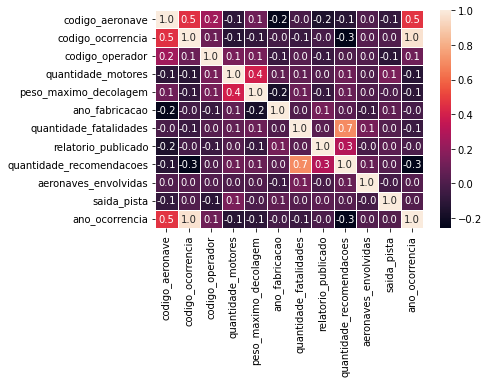

In [39]:
# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Percebemos dois pontos importantes por meio da matriz de correlação: Com correlação superior à 0.5 temos: quantidade_recomendacao vs quantidade de fatalidades 

In [40]:
aero_ocorrencia.head()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano_ocorrencia,turno_ocorrencia
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660.0,...,ATIVA,A DEFINIR,0.0,Não Informado,0.0,1,0.0,2016-07-30,2011,NOITE
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660.0,...,ATIVA,IG-143/CENIPA/2015,0.0,Não Informado,0.0,1,1.0,2016-07-30,2015,NOITE
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310.0,...,FINALIZADA,A-047/CENIPA/2013,1.0,2013-08-28,4.0,1,0.0,2016-07-30,2010,MANHÃ
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633.0,...,FINALIZADA,IG-060/CENIPA/2010,1.0,2010-07-15,1.0,1,1.0,2016-07-30,2009,TARDE
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389.0,...,ATIVA,A DEFINIR,0.0,Não Informado,0.0,1,0.0,2016-07-30,2008,TARDE


In [41]:
import numpy as np

In [42]:
# Dados do gráfico 1  
dados_modelo_aeronave = aero_ocorrencia.groupby('modelo')['modelo'].count()


#seleciona os 10 principais

top10_modelo = np.argpartition(dados_modelo_aeronave, -10)[-10:]

top10_modelo = dados_modelo_aeronave[top10_modelo]


tamanho_conjunto = len(aero_ocorrencia)




In [43]:
# Dados do gráfico 2

dados_fabricante_aeronave = aero_ocorrencia.groupby('fabricante')['fabricante'].count()


#seleciona os 10 principais

top10_fabricante = np.argpartition(dados_fabricante_aeronave, -10)[-10:]

top10_fabricante = dados_fabricante_aeronave[top10_fabricante]


tamanho_conjunto = len(aero_ocorrencia)


Text(0, 0.5, 'QUANTIDADE DE AERONAVES')

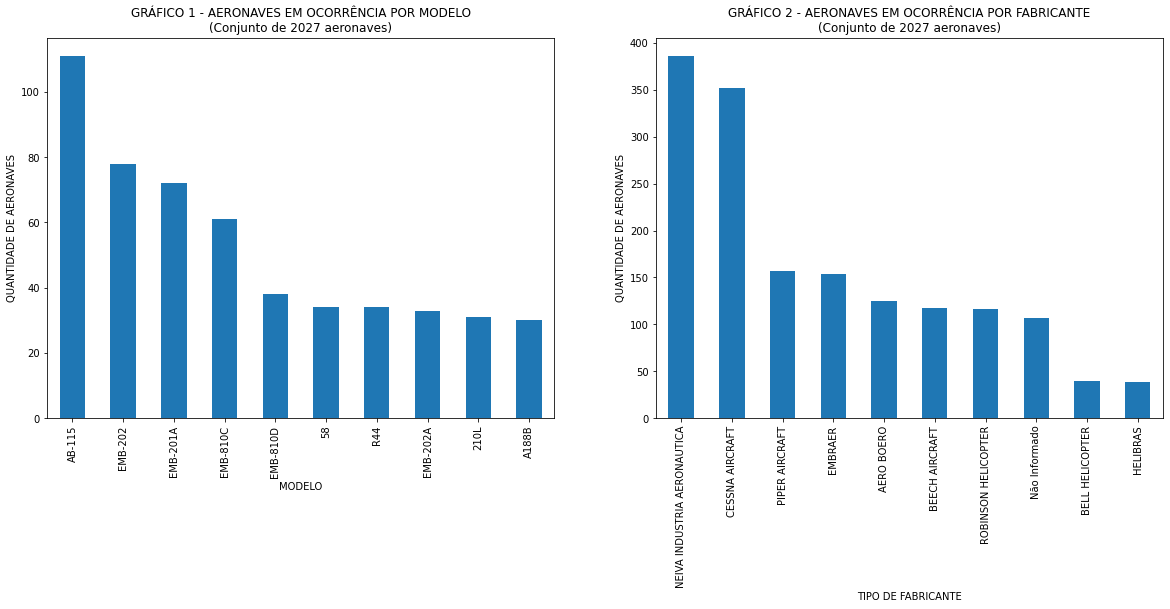

In [44]:
# Gráfico 1

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)


plot = top10_modelo.sort_values(ascending=False).plot(ax=axes[0],kind='bar')



axes[0].set_title(f'GRÁFICO 1 - AERONAVES EM OCORRÊNCIA POR MODELO\n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[0].set_xlabel('MODELO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].tick_params('x')

# Gráfico 2
plot = top10_fabricante.sort_values(ascending=False).plot(ax=axes[1],kind='bar')

axes[1].set_title(f'GRÁFICO 2 - AERONAVES EM OCORRÊNCIA POR FABRICANTE\n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[1].set_xlabel('TIPO DE FABRICANTE')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')



In [45]:
# Dados do gráfico 3

dados_equipamento_aeronave = aero_ocorrencia.groupby('equipamento')['equipamento'].count().sort_values()


tamanho_conjunto = len(aero_ocorrencia)


Text(0, 0.5, 'TIPO DE EQUIPAMENTO')

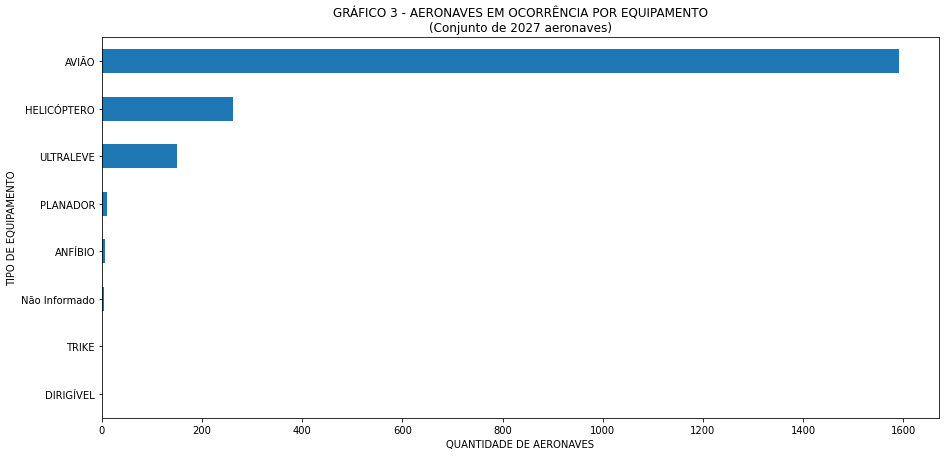

In [63]:
# Gráfico 3


plot = dados_equipamento_aeronave.plot(kind='barh', figsize=(15, 7))

plot.set_title(f'GRÁFICO 3 - AERONAVES EM OCORRÊNCIA POR EQUIPAMENTO\n(Conjunto de {tamanho_conjunto} aeronaves)')

plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('TIPO DE EQUIPAMENTO')


In [47]:
# Dados do gráfico 4
dados_peso_aeronave = aero_ocorrencia.groupby('aero_peso_maximo')['aero_peso_maximo'].count().sort_values()


tamanho_conjunto = len(aero_ocorrencia)

# Dados do gráfico 5

dados_assento_aeronave = aero_ocorrencia.groupby('quantidade_assentos')['quantidade_assentos'].count().sort_values()


tamanho_conjunto = len(aero_ocorrencia)

Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

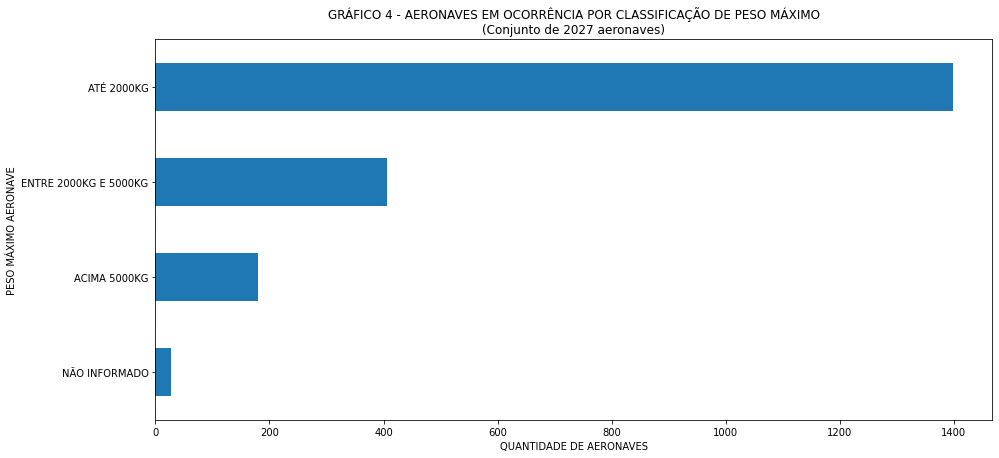

In [64]:
# Gráfico 4


plot = dados_peso_aeronave.plot(kind='barh', figsize=(15, 7))

plot.set_title(f'GRÁFICO 4 - AERONAVES EM OCORRÊNCIA POR CLASSIFICAÇÃO DE PESO MÁXIMO\n(Conjunto de {tamanho_conjunto} aeronaves)')
plot.set_ylabel('PESO MÁXIMO AERONAVE')
plot.set_xlabel('QUANTIDADE DE AERONAVES')



Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

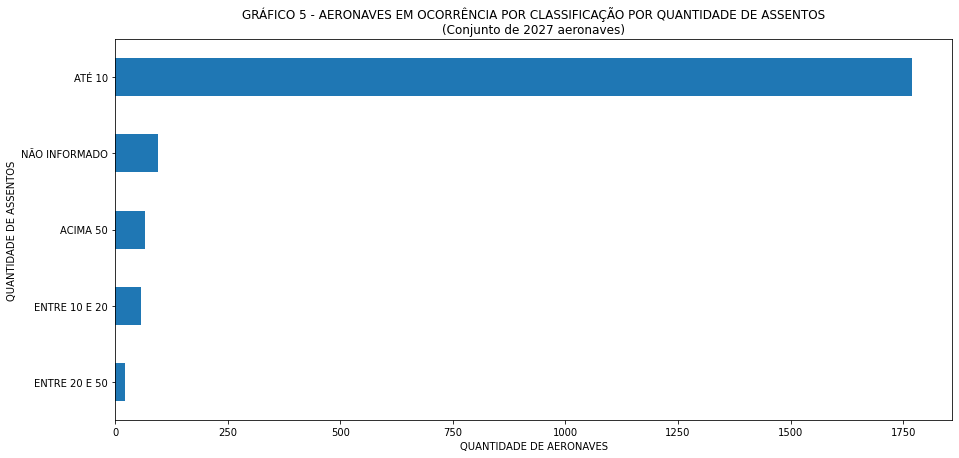

In [65]:
# Gráfico 5
plot = dados_assento_aeronave.plot(kind='barh', figsize=(15, 7))

plot.set_title(f'GRÁFICO 5 - AERONAVES EM OCORRÊNCIA POR CLASSIFICAÇÃO POR QUANTIDADE DE ASSENTOS\n(Conjunto de {tamanho_conjunto} aeronaves)')
plot.set_ylabel('QUANTIDADE DE ASSENTOS')
plot.set_xlabel('QUANTIDADE DE AERONAVES')

Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

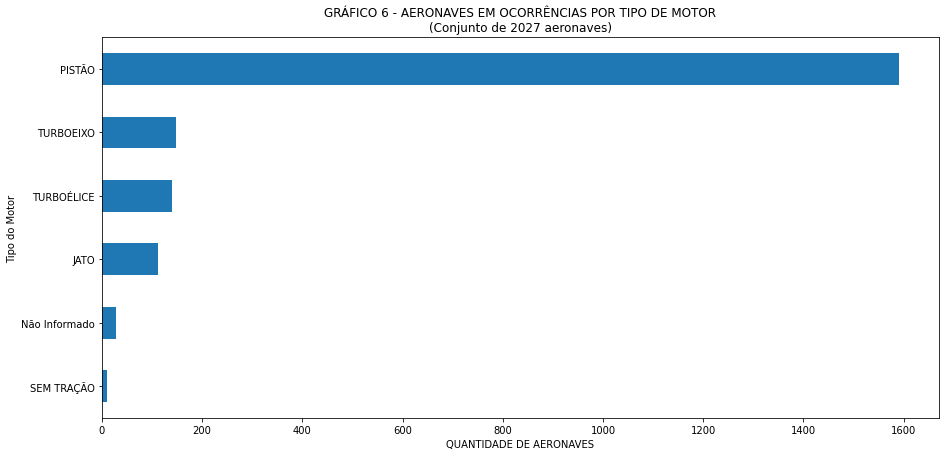

In [66]:
# Dados do gráfico 6
aero_tipo_motor = aero_ocorrencia.groupby('tipo_motor')\
                      ['tipo_motor'].count()

tamanho_conjunto = len(aero_ocorrencia)

# Gráfico 6
plot = aero_tipo_motor.sort_values().plot(kind='barh', figsize=(15, 7))
plot.set_title(f'GRÁFICO 6 - AERONAVES EM OCORRÊNCIAS POR TIPO DE MOTOR\n' +
               f'(Conjunto de {tamanho_conjunto} aeronaves)')
plot.set_ylabel('Tipo do Motor')
plot.set_xlabel('QUANTIDADE DE AERONAVES')


In [51]:
# Dados do gráfico 7
dados_fase_op = aero_ocorrencia.groupby('fase_operacao')['fase_operacao'].count()


tamanho_conjunto = len(aero_ocorrencia)

# Dados do gráfico 8
dados_tipo_op = aero_ocorrencia.groupby('tipo_operacao')['tipo_operacao'].count()


tamanho_conjunto = len(aero_ocorrencia)

Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

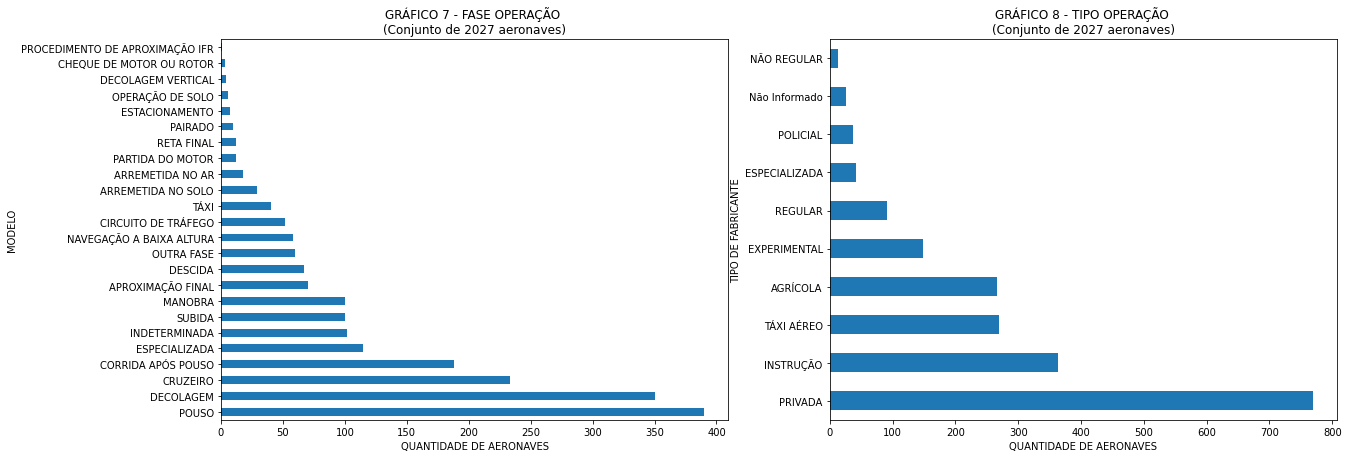

In [67]:
# Gráfico 7

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)


plot = dados_fase_op.sort_values(ascending=False).plot(ax=axes[0],kind='barh')



axes[0].set_title(f'GRÁFICO 7 - FASE OPERAÇÃO \n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[0].set_ylabel('MODELO')
axes[0].set_xlabel('QUANTIDADE DE AERONAVES')


# Gráfico 8
plot = dados_tipo_op.sort_values(ascending=False).plot(ax=axes[1],kind='barh')

axes[1].set_title(f'GRÁFICO 8 - TIPO OPERAÇÃO \n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[1].set_ylabel('TIPO DE FABRICANTE')
axes[1].set_xlabel('QUANTIDADE DE AERONAVES')

Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

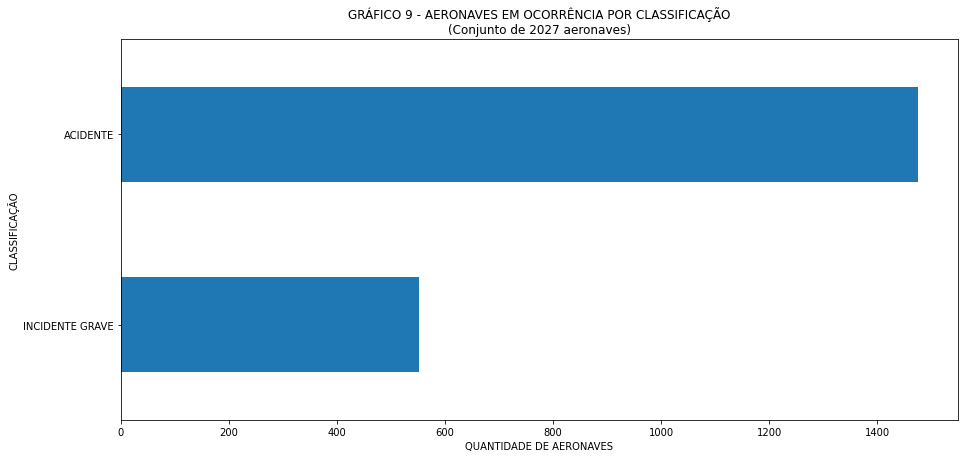

In [69]:
# Dados do gráfico 9
dados_classificacao = aero_ocorrencia.groupby('classificacao')['classificacao'].count().sort_values()

# Gráfico 9

plot = dados_classificacao.sort_values().plot(kind='barh', figsize=(15, 7))
plot.set_title(f'GRÁFICO 9 - AERONAVES EM OCORRÊNCIA POR CLASSIFICAÇÃO\n' +
               f'(Conjunto de {tamanho_conjunto} aeronaves)')
plot.set_ylabel('CLASSIFICAÇÃO')
plot.set_xlabel('QUANTIDADE DE AERONAVES')


Text(0.5, 0, 'QUANTIDADE DE AERONAVES')

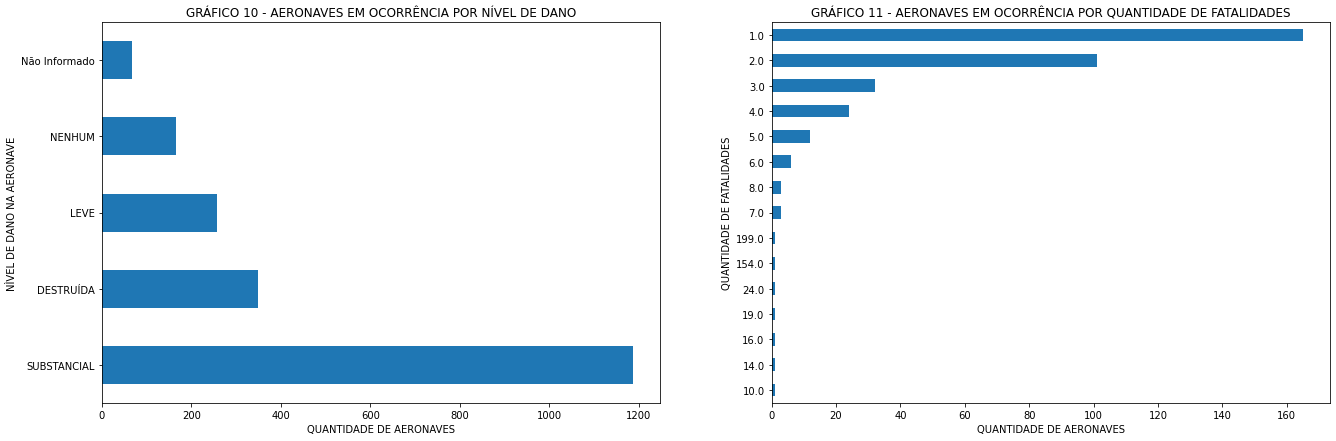

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=False)

# Dados do gráfico 10
dados_nivel_dano = aero_ocorrencia.groupby('nivel_dano')['nivel_dano'].count().sort_values()

# Gráfico 10
plot = dados_nivel_dano.sort_values(ascending=False).plot(ax=axes[0], kind='barh')
axes[0].set_title('GRÁFICO 10 - AERONAVES EM OCORRÊNCIA POR NÍVEL DE DANO')
axes[0].set_ylabel('NÌVEL DE DANO NA AERONAVE')
axes[0].set_xlabel('QUANTIDADE DE AERONAVES')


# Dados do gráfico 11
selecao = aero_ocorrencia[aero_ocorrencia['quantidade_fatalidades'] > 0]
dados_fatalidade = selecao.groupby('quantidade_fatalidades')['quantidade_fatalidades'].count().sort_values()

# Gráfico 11
plot = dados_fatalidade.plot(ax=axes[1], kind='barh')
axes[1].set_title('GRÁFICO 11 - AERONAVES EM OCORRÊNCIA POR QUANTIDADE DE FATALIDADES')
axes[1].set_ylabel('QUANTIDADE DE FATALIDADES')
axes[1].set_xlabel('QUANTIDADE DE AERONAVES')



Text(0, 0.5, 'QUANTIDADE DE AERONAVES')

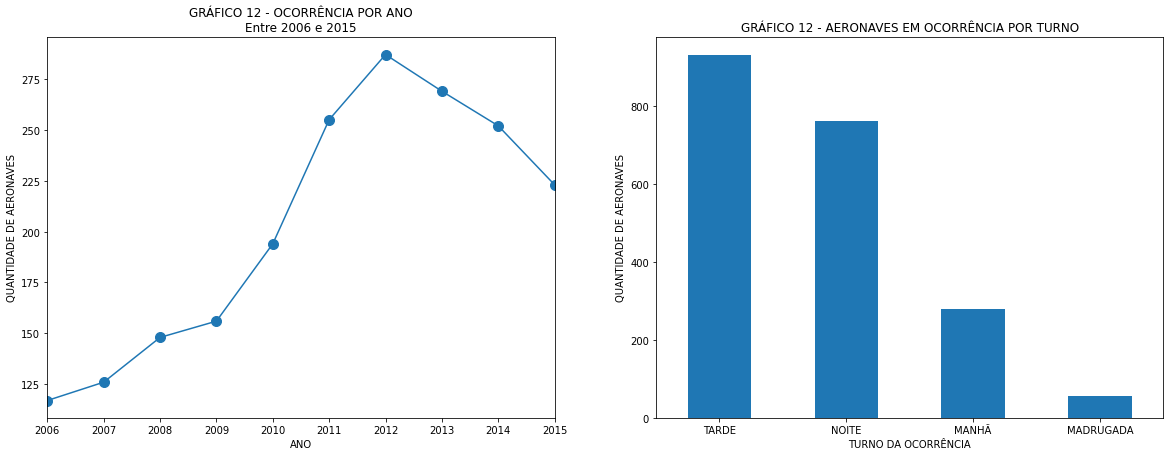

In [55]:
# Análise do turno 

# A partir deste ponto será conduzida uma análise temporal, não apenas da frequência das ocorrências

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 12  
info_ano_ocorrencia = aero_ocorrencia.groupby('ano_ocorrencia')['ano_ocorrencia'].count()

# Gráfico 12
axes[0].plot(info_ano_ocorrencia.index, info_ano_ocorrencia, marker=".", markersize=20.0)
axes[0].set_title('GRÁFICO 12 - OCORRÊNCIA POR ANO\nEntre 2006 e 2015')
axes[0].set_xlabel('ANO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].set_xlim(2006, 2015)


# Dados do Gráfico 13
info_turno_ocorrencia = aero_ocorrencia.groupby('turno_ocorrencia')['turno_ocorrencia'].count()

# Gráfico 13
plot = info_turno_ocorrencia.sort_values(ascending=False).plot(ax=axes[1],kind='bar')

axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 12 - AERONAVES EM OCORRÊNCIA POR TURNO')
axes[1].set_xlabel('TURNO DA OCORRÊNCIA')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

Text(0, 0.5, 'TIPOS DE OCORRÊNCIA')

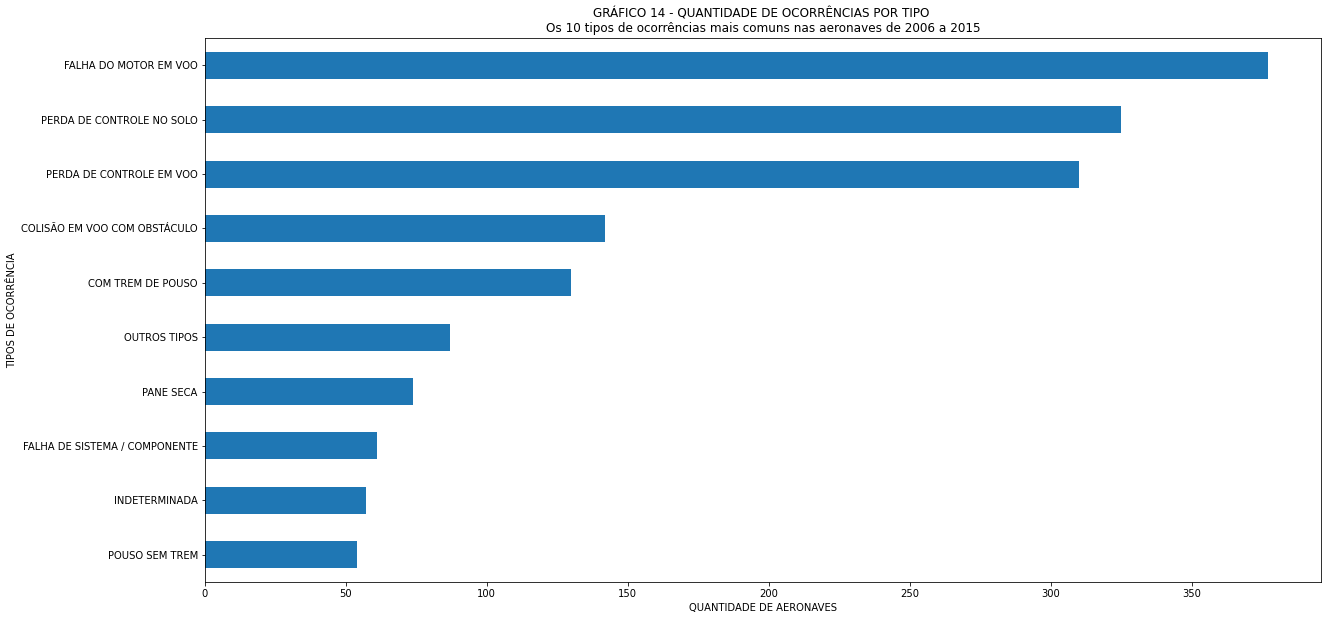

In [72]:
# Dados do gráfico 14

# Seleciona-se os 10 principais tipos de ocorrência
tipo_ocorrencia = aero_ocorrencia.groupby('tipo')['tipo'].count().sort_values().tail(10)

# Gráfico 14
plot = tipo_ocorrencia.tail(20).plot(kind='barh', figsize=(20, 10))

plot.set_title('GRÁFICO 14 - QUANTIDADE DE OCORRÊNCIAS POR TIPO \n'+ 
                  'Os 10 tipos de ocorrências mais comuns nas aeronaves de 2006 a 2015')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('TIPOS DE OCORRÊNCIA')


Text(0, 0.5, 'QUANTIDADE FATALIDADES')

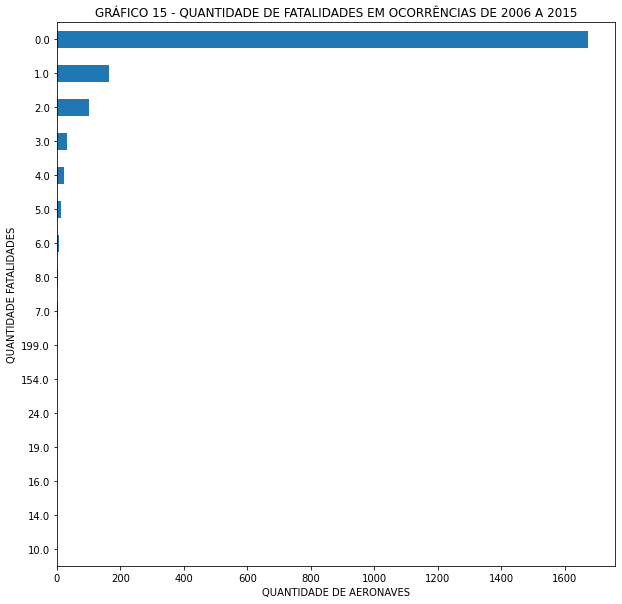

In [57]:
# Analisando "quantidade_recomendações" vs "quantidade_fatalidades" dado que tem correlação de 0.7

# Dados do gráfico 15

# Seleiona-se os 10 principais tipos de ocorrência
fatalidades = aero_ocorrencia.groupby('quantidade_fatalidades')['quantidade_fatalidades'].count().sort_values()

# Gráfico 15
plot = fatalidades.plot(kind='barh', figsize=(10, 10))

plot.set_title('GRÁFICO 15 - QUANTIDADE DE FATALIDADES EM OCORRÊNCIAS DE 2006 A 2015')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('QUANTIDADE FATALIDADES')


Text(0, 0.5, 'QUANTIDADE DE RECOMENDAÇÃO')

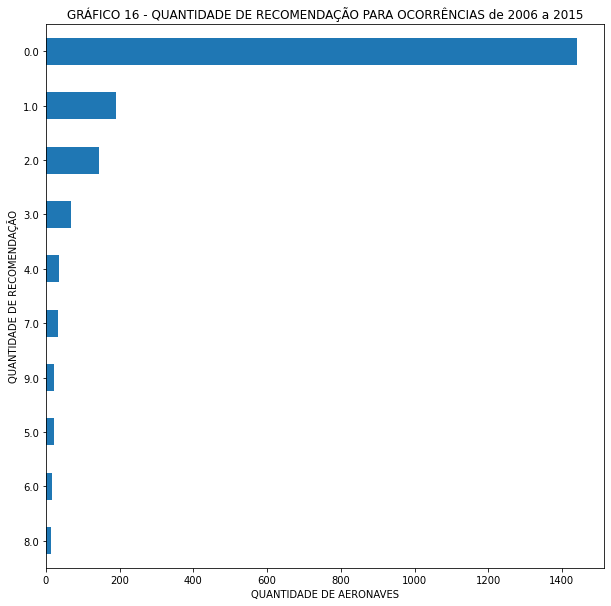

In [58]:
# Dados do gráfico 16

# Seleiona-se os 10 principais tipos de ocorrência
recomendacao = aero_ocorrencia.groupby('quantidade_recomendacoes')['quantidade_recomendacoes'].count().sort_values().tail(10)

# Gráfico 16
plot = recomendacao.tail(20).plot(kind='barh', figsize=(10, 10))

plot.set_title('GRÁFICO 16 - QUANTIDADE DE RECOMENDAÇÃO PARA OCORRÊNCIAS de 2006 a 2015')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('QUANTIDADE DE RECOMENDAÇÃO')

Text(0, 0.5, 'QUANTIDADE DE OCORRÊNCIAS')

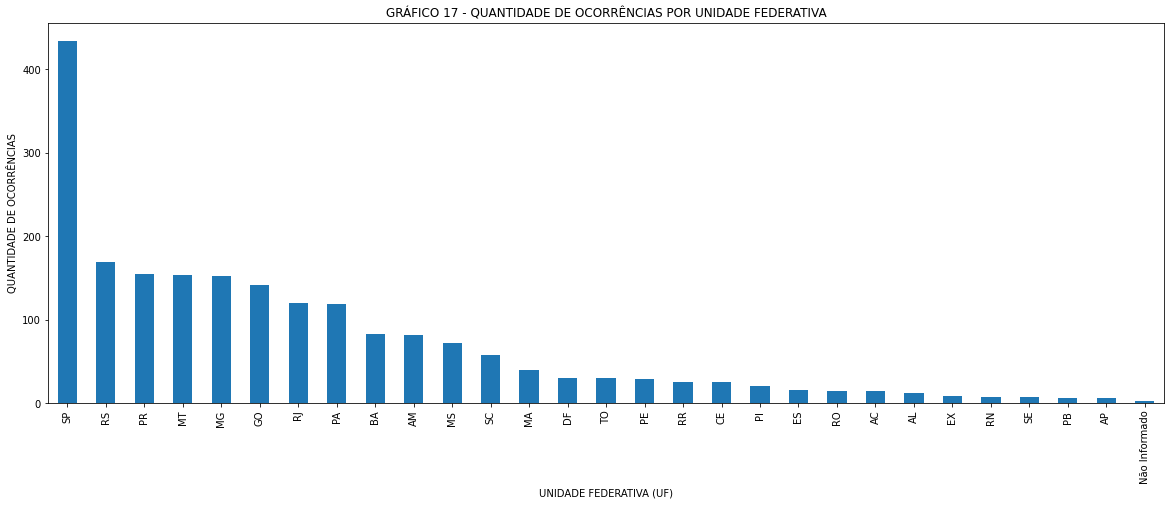

In [59]:
# Dados do gráfico 17
ocorrencia_UF = aero_ocorrencia.groupby('uf')['uf'].count()

# Gráfico 17
plot = ocorrencia_UF.sort_values(ascending=False).plot(kind='bar', figsize=(20, 7))
plot.set_title('GRÁFICO 17 - QUANTIDADE DE OCORRÊNCIAS POR UNIDADE FEDERATIVA')
plot.set_xlabel('UNIDADE FEDERATIVA (UF)')
plot.set_ylabel('QUANTIDADE DE OCORRÊNCIAS')


5. Correlacionando informações de atributos

Text(0.5, 0, 'NÚMERO DE FATALIDADES')

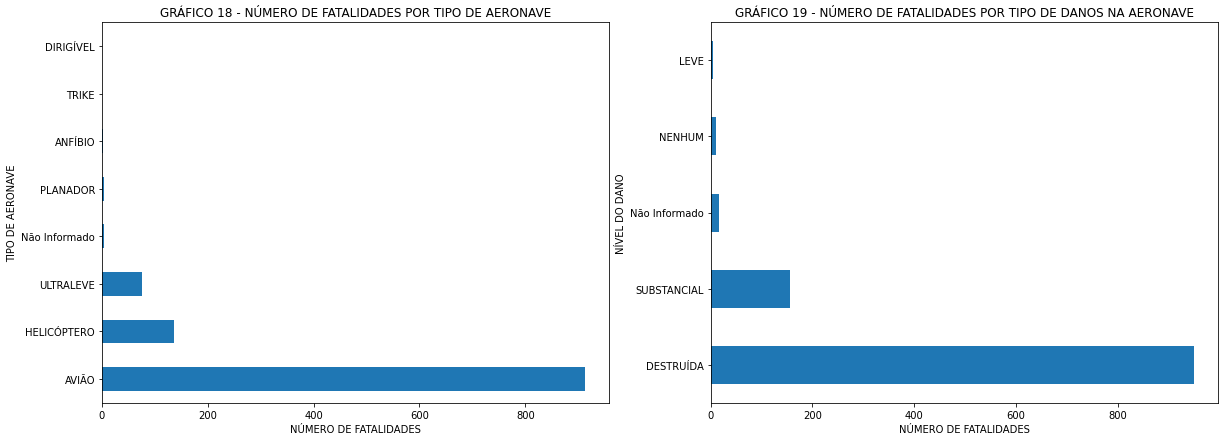

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 18
fatalidades_tipo = aero_ocorrencia.groupby('equipamento')['quantidade_fatalidades'].sum()

# Gráfico 18
plot = fatalidades_tipo.sort_values(ascending=False).plot(ax=axes[0],kind='barh')


axes[0].set_title('GRÁFICO 18 - NÚMERO DE FATALIDADES POR TIPO DE AERONAVE')
axes[0].set_ylabel('TIPO DE AERONAVE')
axes[0].set_xlabel('NÚMERO DE FATALIDADES')

# Dados do gráfico 19
fatalidades_nivel = aero_ocorrencia.groupby('nivel_dano')['quantidade_fatalidades'].sum()

# Gráfico 19
plot = fatalidades_nivel.sort_values(ascending=False).plot(ax=axes[1], kind='barh')

axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 19 - NÚMERO DE FATALIDADES POR TIPO DE DANOS NA AERONAVE')
axes[1].set_ylabel('NÍVEL DO DANO')
axes[1].set_xlabel('NÚMERO DE FATALIDADES')

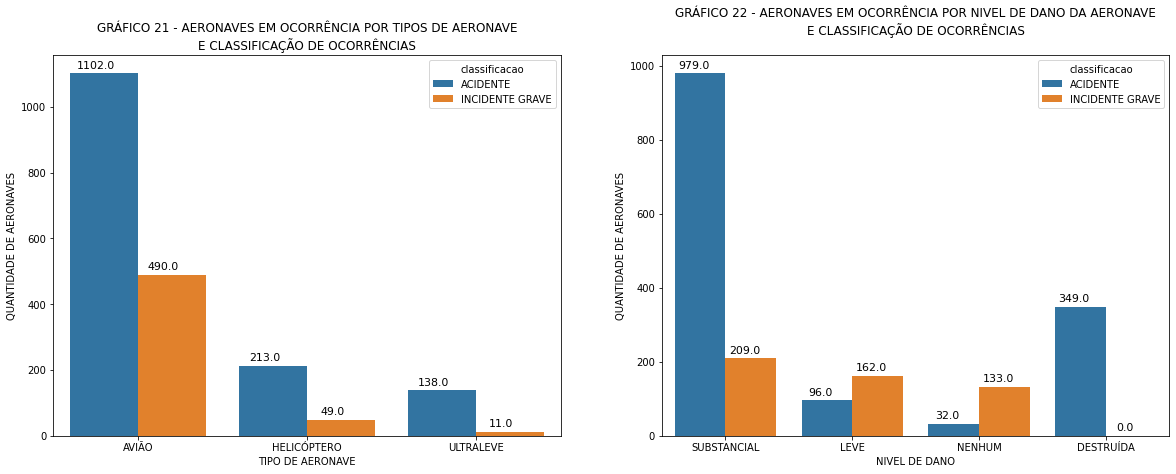

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 21
selecao = aero_ocorrencia.query("equipamento in ['AVIÃO','HELICÓPTERO','ULTRALEVE']")

# Gráfico 21
plot = sns.countplot(ax=axes[0], x='equipamento',data=selecao,hue='classificacao')

axes[0].set_title('GRÁFICO 21 - AERONAVES EM OCORRÊNCIA POR TIPOS DE AERONAVE\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS')
axes[0].set_xlabel('TIPO DE AERONAVE')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)

# Dados do gráfico 22  
selecao = aero_ocorrencia.query("nivel_dano in ['DESTRUÍDA','SUBSTANCIAL','LEVE','NENHUM']")

# Gráfico 22


plot = sns.countplot(ax=axes[1],x='nivel_dano',data=selecao, hue='classificacao')
axes[1].set_title('GRÁFICO 22 - AERONAVES EM OCORRÊNCIA POR NIVEL DE DANO DA AERONAVE\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[1].set_xlabel('NIVEL DE DANO')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)

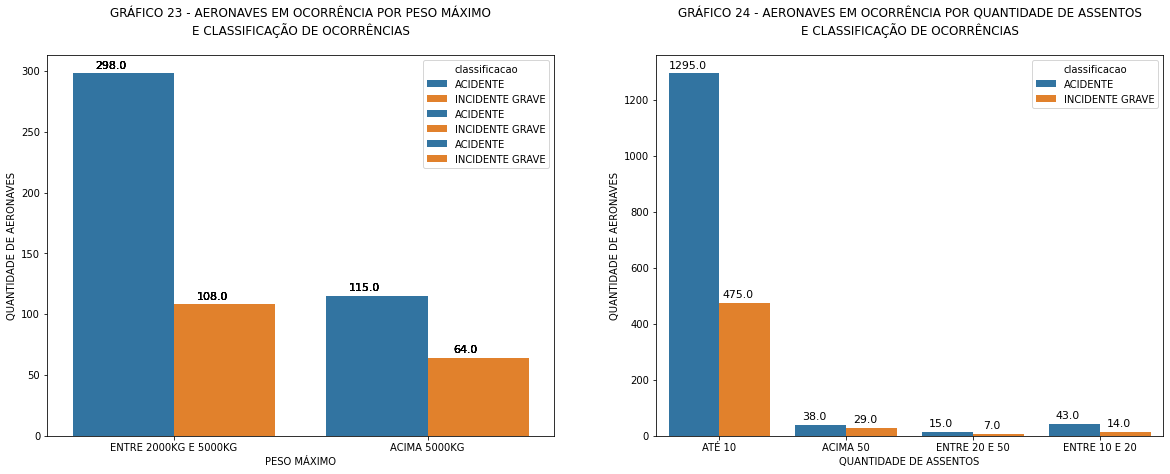

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 23 
selecao = aero_ocorrencia.query("aero_peso_maximo in ['ATÉ 1000KG','ACIMA 5000KG','ENTRE 1000KG E 2000KG', 'ENTRE 2000KG E 5000KG' ]")

# Gráfico 23
plot = sns.countplot(ax=axes[0],x='aero_peso_maximo',data=selecao, hue='classificacao')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 23 - AERONAVES EM OCORRÊNCIA POR PESO MÁXIMO\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[0].set_xlabel('PESO MÁXIMO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)
  

# Dados do gráfico 23 
selecao = aero_ocorrencia.query("aero_peso_maximo in ['ATÉ 1000KG','ACIMA 5000KG','ENTRE 1000KG E 2000KG', 'ENTRE 2000KG E 5000KG' ]")

# Gráfico 23
plot = sns.countplot(ax=axes[0],x='aero_peso_maximo',data=selecao, hue='classificacao')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 23 - AERONAVES EM OCORRÊNCIA POR PESO MÁXIMO\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[0].set_xlabel('PESO MÁXIMO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)
  
# Dados do gráfico 23 
selecao = aero_ocorrencia.query("aero_peso_maximo in ['ATÉ 1000KG','ACIMA 5000KG','ENTRE 1000KG E 2000KG', 'ENTRE 2000KG E 5000KG' ]")

# Gráfico 23
plot = sns.countplot(ax=axes[0],x='aero_peso_maximo',data=selecao, hue='classificacao')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 23 - AERONAVES EM OCORRÊNCIA POR PESO MÁXIMO\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[0].set_xlabel('PESO MÁXIMO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)
  

# Dados do gráfico 24 
selecao = aero_ocorrencia.query("quantidade_assentos in ['ATÉ 10','ACIMA 50','ENTRE 10 E 20', 'ENTRE 20 E 50' ]")

# Gráfico 24
plot = sns.countplot(ax=axes[1],x='quantidade_assentos',data=selecao, hue='classificacao')

axes[1].set_title('GRÁFICO 24 - AERONAVES EM OCORRÊNCIA POR QUANTIDADE DE ASSENTOS\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[1].set_xlabel('QUANTIDADE DE ASSENTOS')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)
